# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [ ]:
import sklearn
from sklearn import datasets

digits_dataset = datasets.load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [ ]:
digits_img = digits_dataset.images

Verifique o formato de **digits_img**.

In [ ]:
digits_img.shape

(1797, 8, 8)

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [ ]:
digits_img

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [ ]:
digits_img[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [ ]:
from matplotlib import pyplot as plt

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

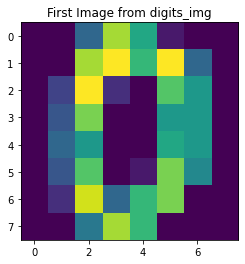

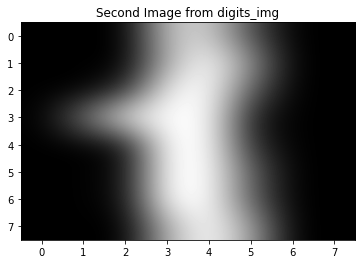

In [ ]:
first_image = digits_img[0]
second_image = digits_img[1]

image1 = plt.imshow(first_image)
plt.title('First Image from digits_img')
plt.show()

image2 = plt.imshow(second_image, cmap = 'gist_gray', aspect = 'auto', interpolation = 'bicubic')
plt.title('Second Image from digits_img')
plt.show()

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [ ]:
import numpy as np

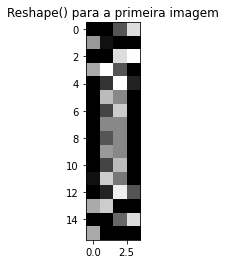

In [ ]:
## Exemplo de uso do reshape() apenas para a primeira imagem
first_image_reshaped = np.reshape(first_image, (16, 4))
plt.imshow(first_image_reshaped, cmap = 'gist_gray', aspect = 'equal')
plt.title('Reshape() para a primeira imagem')
plt.show()

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [ ]:
digits = digits_img.reshape(1797, 64)

print(digits[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [ ]:
digits.shape

(1797, 64)

In [ ]:
digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

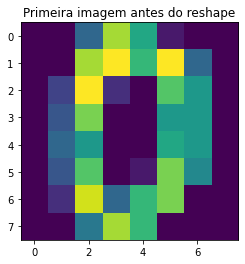

----------------------------------------------


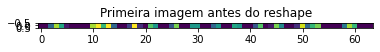

In [ ]:
firstimage_reshaped = digits[0]

plt.imshow(first_image)
plt.title('Primeira imagem antes do reshape')
plt.show()

print('----------------------------------------------')

plt.imshow(digits[:1,:])
plt.title('Imagem após o reshape')
plt.show()

Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [ ]:
digits_target = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [ ]:
digits_target

array([0, 1, 2, ..., 8, 9, 8])

Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [ ]:
digits_target.shape

(1797,)

#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [ ]:
from sklearn.model_selection import train_test_split

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [ ]:
digits.shape

(1797, 64)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits, digits_target, test_size = 0.25, random_state = 30)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [ ]:
# Features de treino
print(x_train.shape) 

(1347, 64)


In [ ]:
# Features de teste
print(x_test.shape) 

(450, 64)


In [ ]:
# Target de treino
print(y_train.shape) 

(1347,)


In [ ]:
# Target de teste
print(y_test.shape) 

(450,)


### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [ ]:
y_pred = knn.predict(x_test)

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [ ]:
accuracy_score(y_test, y_pred)

0.9822222222222222

Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 33]])

### Decision Tree

#### Treinamento

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [ ]:
dt = DecisionTreeClassifier()

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [ ]:
y_pred = dt.predict(x_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [ ]:
accuracy_score(y_test, y_pred)

0.8355555555555556

Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[40,  0,  0,  0,  0,  2,  0,  0,  1,  1],
       [ 0, 35,  2,  4,  3,  0,  0,  0,  6,  1],
       [ 0,  0, 42,  2,  0,  0,  1,  0,  4,  0],
       [ 0,  1,  1, 26,  0,  2,  0,  2,  1,  4],
       [ 1,  1,  0,  0, 42,  1,  2,  1,  0,  2],
       [ 0,  0,  0,  0,  3, 43,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  2,  0, 51,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1, 38,  0,  1],
       [ 0,  2,  1,  5,  1,  0,  0,  1, 28,  2],
       [ 0,  1,  0,  2,  0,  2,  0,  0,  1, 31]])

## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

A acurácia mede o quão próximo um resultado obtido é de seu valor referência real. Quanto maior o valor de acurácia, mais próximo o valor obtido será do valor real. 
Fazer o uso apenas da Acurácia não é suficiente, visto que pode gerar Falso Negativos e Falso Positivos.
Para complementar, é utilizado a Precisão e a Sensibilidade (Revocação ou Recall). A Sensibilidade é capaz de avaliar o grau de sucesso dos resultados com base nos positivos. Já a Precisão apresenta uma medida que expressa a quantidade de positivos sobre todos os valores positivos encontrados, seja Falso Positivo e Positivos Verdadeiros. 

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

A matriz de confusão mostra a quantidade de erros e acertos para cada uma das classes, indicando a qualidade do modelo utilizado. A matriz é dividida entre Falso Positivo, Positivo Verdadeiro, Falso Negativo e Negativo Verdadeiro.

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

Cada linha e coluna da matriz representam classes diferentes. A diagonal principal indica a frequência de acertos do teste realizado e o restante os erros que aconteceram.

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

Sim, poderiamos visualizar a matriz de confusão como um heatmap em tons de cinza. Nesse cenário, quanto mais claro ou escuro um tom mais próximo ele estaria de um extremo da gradação da matriz de confusão. O melhor resultado possível a ser observado nesse heatmap seria ter a diagonal principal somente com tons escuros.

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

Geralmente, é utilizado valores ímpares, primos e pequenos para K, para evitar empates em classificações binárias por exemplo. Os valores de K podem influenciar na acurácia do algoritmo e, portanto, devem ser testados diversos valores de K para encontrar a melhor acurácia.

### 6. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

Com base nos valores de acurácia obtidos nesse laboratório, conclui-se que o classificador KNN obteve uma acurácia maior (98,2%) do que o classificador de Árvore de Decisão (83,5%).
Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o KNN não necessariamente sairia melhor do que o de Árvore de Decisão, pois ambos os métodos apresentam vantagens e desvantagens e variam de desempenho de acordo com a base de dados utilizada

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)